In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nci = pd.read_csv("IC50.csv")
nci.head()

,RELEASE_DATE,EXPID,PREFIX,NSC,CONCENTRATION_UNIT,LOG_HI_CONCENTRATION,PANEL_NUMBER,CELL_NUMBER,PANEL_NAME,CELL_NAME,PANEL_CODE,COUNT,AVERAGE,STDDEV
0,20210223,0001MD02,S,123127,M,-4.6021,1,21,Non-Small Cell Lung Cancer,NCI-H460,LNS,1,-8.1196,0.0
1,20210223,0001MD02,S,123127,M,-4.6021,10,14,Melanoma,M14,MEL,1,-6.7945,0.0
2,20210223,0001MD02,S,123127,M,-4.6021,12,16,CNS Cancer,SF-539,CNS,1,-6.6120,0.0
3,20210223,0001MD02,S,123127,M,-4.6021,4,10,Colon Cancer,COLO 205,COL,1,-6.3511,0.0
4,20210223,0001MD02,S,123127,M,-4.6021,4,9,Colon Cancer,SW-620,COL,1,-6.5272,0.0


In [4]:
gdsc = pd.read_csv("../../GDSC/processed_transcdr/CDR_n156813.txt", delimiter="\t", index_col=0)
gdsc.head()

,COSMIC_ID,cell_type,drug_id,lnIC50,drug_name,smiles,assay_name,GDSC_tissue,cancer_type
0,910944.0,ALL-PO,221,2.11,TAK-715,CCc1nc(-c2cccc(C)c2)c(-c2ccnc(NC(=O)c3ccccc3)c...,5500994172383112813929_H02,lymphoblastic_leukemia,ALL
1,910944.0,ALL-PO,152,-0.76,CP466722,COc1cc2ncnc(-n3nc(-c4ccccn4)nc3N)c2cc1OC,5500994172383112813929_H02,lymphoblastic_leukemia,ALL
2,910944.0,ALL-PO,203,1.39,BMS-345541,Cc1ccc2nc(NCCN)c3ncc(C)n3c2c1,5500994172383112813929_H02,lymphoblastic_leukemia,ALL
3,910944.0,ALL-PO,230,3.68,GSK429286A,CC1=C(C(=O)Nc2cc3cn[nH]c3cc2F)C(c2ccc(C(F)(F)F...,5500994172383112813929_H02,lymphoblastic_leukemia,ALL
4,910944.0,ALL-PO,206,3.08,Ruxolitinib,N#CC[C@H](C1CCCC1)n1cc(-c2ncnc3[nH]ccc23)cn1,5500994172383112813929_H02,lymphoblastic_leukemia,ALL


In [5]:
nsc_smiles = pd.read_csv("nsc_smiles.csv")
nsc_smiles.head()

,NSC,SMILES
0,1,CC1=CC(=O)C=CC1=O
1,2,S(Sc1nc2ccccc2s1)c3nc4ccccc4s3
2,3,Oc1c(Cl)cc(cc1[N+](=O)[O-])[N+](=O)[O-]
3,4,Nc1ncc(s1)[N+](=O)[O-]
4,5,Nc1ccc2C(=O)c3ccccc3C(=O)c2c1


In [6]:
nci_smiles = list(set(nsc_smiles["SMILES"]))
gdsc_smiles = list(set(gdsc["smiles"]))
common_smiles = [x for x in nci_smiles if x in gdsc_smiles]
common_smiles_nsc = nsc_smiles[nsc_smiles["SMILES"].isin(common_smiles)]
common_smiles_nsc.head()

,NSC,SMILES
74635,91874,CCCCCCCCCCCC1=C(O)C(=O)C=C(O)C1=O
281292,756292,COc1ccc(COc2ccc(Cc3cnc(N)nc3N)cc2OC)cc1
282080,757438,CCCS(=O)(=O)Nc1ccc(F)c(C(=O)c2c[nH]c3ncc(Cl)cc...
282235,758007,COc1cc2nccc(Oc3ccc(NC(=O)Nc4cc(C)on4)c(Cl)c3)c...
301964,800952,COc1cc2nccc(Oc3ccc(NC(=O)Nc4cc(C)on4)c(Cl)c3)c...


In [7]:
nci_cells = list(set(nci["CELL_NAME"]))
gdsc_cells = list(set(gdsc["cell_type"]))
common_cells = [x for x in gdsc_cells if x in nci_cells]

In [8]:
nci_common_cdr = nci[nci["NSC"].isin(common_smiles_nsc["NSC"]) & nci["CELL_NAME"].isin(common_cells)]
gdsc_common_cdr = gdsc[gdsc["smiles"].isin(common_smiles) & gdsc["cell_type"].isin(common_cells)]
gdsc_common_cdr.head()

,COSMIC_ID,cell_type,drug_id,lnIC50,drug_name,smiles,assay_name,GDSC_tissue,cancer_type
4508,910861.0,RL,193,4.84,GW-2580,COc1ccc(COc2ccc(Cc3cnc(N)nc3N)cc2OC)cc1,5500994158987071513201_C03,B_cell_lymphoma,DLBC
4533,910861.0,RL,312,0.10,AV-951,COc1cc2nccc(Oc3ccc(NC(=O)Nc4cc(C)on4)c(Cl)c3)c...,5500994158987071513201_C03,B_cell_lymphoma,DLBC
4604,910861.0,RL,172,4.77,Embelin,CCCCCCCCCCCC1=C(O)C(=O)C=C(O)C1=O,5500994158987071513201_C03,B_cell_lymphoma,DLBC
4656,910861.0,RL,1036,4.39,PLX4720,CCCS(=O)(=O)Nc1ccc(F)c(C(=O)c2c[nH]c3ncc(Cl)cc...,5500994158987071513201_C03,B_cell_lymphoma,DLBC
4668,910861.0,RL,1001,7.10,AICAR,NC(=O)c1ncn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c1N,5500994158987071513201_C03,B_cell_lymphoma,DLBC


In [9]:
# Merge nci_common_cdr with nsc_smiles to obtain smiles corresponding to NSC
nci_common_cdr = pd.merge(nci_common_cdr, nsc_smiles, how='inner', on='NSC')
nci_common_cdr.head()

,RELEASE_DATE,EXPID,PREFIX,NSC,CONCENTRATION_UNIT,LOG_HI_CONCENTRATION,PANEL_NUMBER,CELL_NUMBER,PANEL_NAME,CELL_NAME,PANEL_CODE,COUNT,AVERAGE,STDDEV,SMILES
0,20210223,1103NS08,S,756292,M,-4.6021,10,7,Melanoma,SK-MEL-5,MEL,1,-5.1246,0.0,COc1ccc(COc2ccc(Cc3cnc(N)nc3N)cc2OC)cc1
1,20210223,1103NS08,S,756292,M,-4.6021,11,3,Prostate Cancer,DU-145,PRO,1,-4.6021,0.0,COc1ccc(COc2ccc(Cc3cnc(N)nc3N)cc2OC)cc1
2,20210223,1103NS08,S,756292,M,-4.6021,4,17,Colon Cancer,KM12,COL,1,-5.7898,0.0,COc1ccc(COc2ccc(Cc3cnc(N)nc3N)cc2OC)cc1
3,20210223,1103NS08,S,756292,M,-4.6021,6,5,Ovarian Cancer,OVCAR-8,OVA,1,-4.6021,0.0,COc1ccc(COc2ccc(Cc3cnc(N)nc3N)cc2OC)cc1
4,20210223,1103NS08,S,756292,M,-4.6021,1,1,Non-Small Cell Lung Cancer,NCI-H23,LNS,1,-4.6021,0.0,COc1ccc(COc2ccc(Cc3cnc(N)nc3N)cc2OC)cc1


In [10]:
renamed_gdsc_common_cdr = gdsc_common_cdr.rename(columns={'smiles': 'SMILES', 'cell_type': 'CELL_NAME'})
renamed_gdsc_common_cdr.head()

,COSMIC_ID,CELL_NAME,drug_id,lnIC50,drug_name,SMILES,assay_name,GDSC_tissue,cancer_type
4508,910861.0,RL,193,4.84,GW-2580,COc1ccc(COc2ccc(Cc3cnc(N)nc3N)cc2OC)cc1,5500994158987071513201_C03,B_cell_lymphoma,DLBC
4533,910861.0,RL,312,0.10,AV-951,COc1cc2nccc(Oc3ccc(NC(=O)Nc4cc(C)on4)c(Cl)c3)c...,5500994158987071513201_C03,B_cell_lymphoma,DLBC
4604,910861.0,RL,172,4.77,Embelin,CCCCCCCCCCCC1=C(O)C(=O)C=C(O)C1=O,5500994158987071513201_C03,B_cell_lymphoma,DLBC
4656,910861.0,RL,1036,4.39,PLX4720,CCCS(=O)(=O)Nc1ccc(F)c(C(=O)c2c[nH]c3ncc(Cl)cc...,5500994158987071513201_C03,B_cell_lymphoma,DLBC
4668,910861.0,RL,1001,7.10,AICAR,NC(=O)c1ncn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c1N,5500994158987071513201_C03,B_cell_lymphoma,DLBC


In [11]:
merged_df = pd.merge(nci_common_cdr, renamed_gdsc_common_cdr, how='inner', on=['SMILES', 'CELL_NAME'])
cdr_correlation = merged_df[['AVERAGE', 'lnIC50', 'SMILES']]
cdr_correlation.head()

,AVERAGE,lnIC50,SMILES
0,-5.1246,5.72,COc1ccc(COc2ccc(Cc3cnc(N)nc3N)cc2OC)cc1
1,-5.2924,5.72,COc1ccc(COc2ccc(Cc3cnc(N)nc3N)cc2OC)cc1
2,-4.6021,5.44,COc1ccc(COc2ccc(Cc3cnc(N)nc3N)cc2OC)cc1
3,-4.6021,5.44,COc1ccc(COc2ccc(Cc3cnc(N)nc3N)cc2OC)cc1
4,-5.7898,2.54,COc1ccc(COc2ccc(Cc3cnc(N)nc3N)cc2OC)cc1


In [21]:
x = cdr_correlation["AVERAGE"]
x = np.power(10, x) * (10 ** 6)
x = np.log(x)

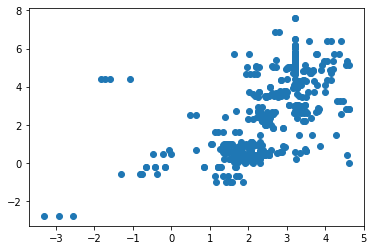

In [22]:
y = cdr_correlation["lnIC50"]
plt.scatter(x,y)
plt.show()

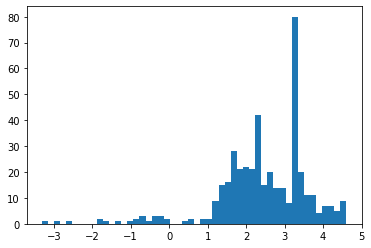

In [26]:
plt.hist(x, bins=50)
plt.show()

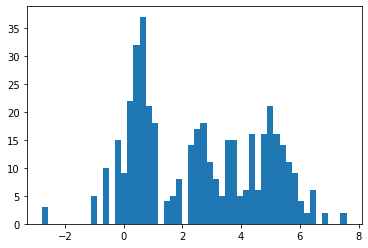

In [25]:
plt.hist(y, bins=50)
plt.show()